In [1]:
from NN import *
from LTL import *
from Utility_funcs import *

from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np
from matplotlib import pyplot as plt
import time

2023-09-03 17:51:38.648757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of Omega-automaton states (including the trap state): 13


KeyError: ('D',)

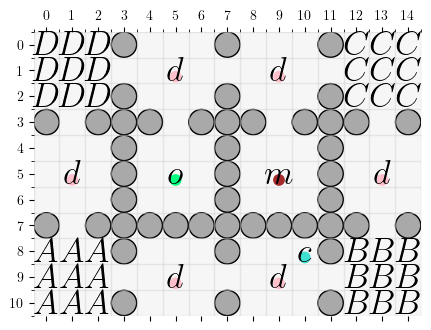

In [12]:
ltl = ('G ('
       '!d &'
       '(a -> ((!a) U (b|c))) & '
       '(a -> ! (X a)) & '
       '(b -> ! (X b)) &'
       'e -> (X e) &'
       '(c -> ((!c) U e))) & '
        'F a ')

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])

# MDP Description
shape = (11, 15)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E', 'E',  'E',  'E',  'E',  'E',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['B',  'E',  'B',  'B',  'B',  'E',  'B', 'B',  'B',  'E',  'B',  'B',  'B',  'E', 'B'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['B',  'E',  'B',  'B',  'B',  'B',  'B', 'B',  'B',  'B',  'B',  'B',  'B',  'E', 'B'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E', 'E',  'E',  'E',  'E',  'E',  'E',  'E', 'E'],
['E',  'E',  'E',  'B',  'E',  'E',  'E', 'B',  'E',  'E',  'E',  'B',  'E',  'E', 'E']
])

# Labels of the states
label = np.array([
[('D',),('D',),('D',),(),    (),    (),    (),    (),    (),    (),    (),    (),('C',),('C',),('C',),],
[('D',),('D',),('D',),(),    (),    ('d',),(),    (),    (),    ('d',),(),    (),('C',),('C',),('C',),],
[('D',),('D',),('D',),(),    (),    (),    (),    (),    (),    (),    (),    (),('C',),('C',),('C',),],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),('d',),    (),    (),    (),    ('o',),    (),    (),    (),    ('m',),(),    (),    (),('d',),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[(),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    (),    ()],
[('A',),('A',),('A',),(),    (),    (),    (),    (),    (),    (),('c',),    (),('B',),('B',),('B',)],
[('A',),('A',),('A',),(),    (),('d',),    (),    (),    (),('d',),    (),    (),('B',),('B',),('B',)],
[('A',),('A',),('A',),(),    (),    (),    (),    (),    (),    (),    (),    (),('B',),('B',),('B',)]
],dtype=object)
# Colors of the labels
lcmap={
    ('a',):'yellow',
    ('b',):'greenyellow',
    ('c',):'turquoise',
    ('d',):'pink',
    ('e',):'limegreen',
    ('o',):'springgreen',
    ('m',):'brown'
}
p=1
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap, p=p, figsize=5)  # Use figsize=4 for smaller figures
grid_mdp.plot(save="env.pdf")

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)
max_rew = round(csrl.reward.max(), 3)

s_vectors = state_vectors(csrl)
enc = list(np.unique(grid_mdp.label))
enc.pop(enc.index(()))
ch_states = channeled(csrl, enc)
total_number_of_states = csrl.mdp.shape[0]*csrl.mdp.shape[1]*csrl.oa.shape[1]

In [18]:
t = "[] (~d /\ (a -> (~a U (b \/ c))) /\ (a -> ! > a) /\ (b -> ~ >b) /\ (e -> (> e)) /\ (c -> ((~c) U e))) /\ <> a"

ltl = ('G ('
       '!d &'
       '(a -> ((!a) U (b|c))) & '
       '(a -> ! (X a)) & '
       '(b -> ! (X b)) &'
       'e -> (X e) &'
       '(c -> ((!c) U e))) & '
        'F a ')

LTL_formula = parser.parse(t)
predicates=grid_mdp.get_predicates()
print(predicates)

Syntax error at 'U'
Syntax error at ')'
Illegal character '!'
Syntax error at 'U'
{'a': [0], 'b': [6], 'c': [42], 'd': [7, 13, 16, 18, 21, 27, 30, 32, 35, 41], 'e': [48]}


In [13]:
model = build_model(csrl.ch_states[(0,0,0,0)].shape, csrl.shape[-1])
# model.summary()

In [14]:
N, W, Q, P, visited = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()

In [15]:
visited_states_train = []
visited_states_test = []
LTL_coef = 10

search_depth = 25
MCTS_samples = 200

num_training_epochs =  25
num_test_epochs = 20
training = True
epochs = 10
T = [25]
K = 1
batch_size = 32
steps_per_epoch = 4
idx = 0
success_rates = []
succes_std = []
win_hist = []
train_history = []

# os.remove("Log_run.txt")
model = build_model(ch_states[(0,0,0,0)].shape, csrl.shape[-1])
for i in T:
    # C = Cs[idx % 5]
    # LTL_coef = LTL_coefs[idx]
    # print(C)
    idx += 1
    # TRAIN ##############################
    train_wins = 0
    # num_training_epochs = int(200 - 1.9*i)
    N, W, Q, P, visited_train = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_training_epochs):
        t1 = time.time()
        print(Q[(0,0,0,0)][:4], len(visited_train))
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=0.1, tow=0.7, n_samples=MCTS_samples, visited=visited_train,
                start=(0,0), search_depth=search_depth, verbose=0, T=i, K=K, run_num=epoch, ltl_f_rew=False, LTL_coef=LTL_coef)
        
        # print('N',N[(0,0,4,1)][:5])
        visited_states_train += state_history
        t2 = time.time()
        # print(t2-t1, " run episode")

        # win = check_LTL(LTL_formula, trajectory, predicates)[0]
        if reward_history[-1]>0: train_wins+=1

        if training and len(action_history)>0:
            if epoch==0:
                x_train = np.array(channeled_states)[:-1]
                y1_train = np.array(better_policy)
                y2_train = np.array(reward_history) + LTL_coef*reward_history[-1]
                # y2_train = np.array(reward_history)
                y2_train = y2_train[:-1]
            else:
                x_train = np.concatenate((x_train, np.array(channeled_states)[:-1]),0)
                y1_train = np.concatenate((y1_train, np.array(better_policy)),0)
                y2_train_curr = np.array(reward_history) + LTL_coef*reward_history[-1]
                # y2_train_curr = np.array(reward_history)
                y2_train = np.concatenate((y2_train, y2_train_curr[:-1]),0)
            t3= time.time()
            # print(t3-t2, " build database")
            tr_hist = model.fit(x_train, [y1_train, y2_train], epochs=epochs, batch_size=batch_size,
                                steps_per_epoch=steps_per_epoch if len(x_train)>steps_per_epoch*epochs*batch_size else None, verbose=0)
            train_history += tr_hist.history['loss']
        # win_hist.append(win)
        t4 = time.time()
        # print(t4-t3, "fit", len(x_train))
    print("Train wins:",train_wins,"/", num_training_epochs)

    # TEST ##############################
    test_wins = 0
    N, W, Q, P, visited_test = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_test_epochs):
        
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=0.1, tow=0.7, n_samples=MCTS_samples, visited=visited_test,
                start=(0,0), search_depth=search_depth, verbose=0, T=i, K=1, NN_value_active=True)

        # win = check_LTL(LTL_formula, trajectory, predicates)[0]
        win = reward_history[-1]
        if win: test_wins+=1
        win_hist.append(win)
        visited_states_test += state_history
        
    success_rates.append(100*test_wins/num_test_epochs)
    temp = np.zeros(num_test_epochs)
    temp[:test_wins]=1
    std = np.sqrt(num_test_epochs*np.var(temp))
    succes_std.append((success_rates[-1]-std, success_rates[-1]+std))
    ###############################################################
    print("Test wins:",test_wins,"/",num_test_epochs)
    # print("last reward:", reward_history[-1], "  | trajectory:", trajectory)
    # print("Actions:", action_history)

encode_visited_states_test = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_test]
encode_visited_states_train = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_train]

# u, d, r, l

[0. 0. 0. 0.] 0
0 ) MCTS conf: -0.18 , det: 0.65 | LTL [---]  LDBA [ 0.0 ] path: [0, 1, 2, 3, 4, 5, 12, 19, 26, 25, 26, 33, 40, 47, 46, 39, 38, 37, 36, 43, 44, 44, 45, 44, 45]
[-0.17820513 -0.8        -0.17815126 -0.8       ] 40
1 ) MCTS conf: -0.3 , det: 0.64 | LTL [---]  LDBA [ 0.0 ] path: [0, 1, 2, 3, 2, 3, 4, 5, 12, 19, 26, 33, 40, 47, 46, 39, 38, 31, 38, 37, 36, 43, 44, 45, 44]
[-0.23987342 -0.8        -0.23933054 -0.8       ] 40
2 ) MCTS conf: -0.3 , det: 0.64 | LTL [---]  LDBA [ 0.0 ] path: [0, 1, 2, 3, 4, 5, 12, 19, 26, 33, 40, 47, 46, 39, 38, 37, 36, 37, 44, 45, 44, 45, 38, 39, 38]
[-0.25991561 -0.8        -0.25972222 -0.8       ] 40
3 ) MCTS conf: -0.3 , det: 0.64 | LTL [---]  LDBA [ 0.0 ] path: [0, 1, 2, 3, 4, 5, 12, 19, 26, 33, 40, 47, 46, 39, 38, 37, 36, 43, 42, 43, 42, 43, 36, 29, 22]
[-0.27003155 -0.8        -0.26979167 -0.8       ] 40
4 ) MCTS conf: -0.3 , det: 0.64 | LTL [---]  LDBA [ 0.0 ] path: [0, 1, 2, 3, 4, 5, 12, 19, 26, 33, 40, 47, 46, 45, 38, 45, 46, 45, 44, 44

KeyboardInterrupt: 

exploration in training: 0.31
exploration in testing: 0.22


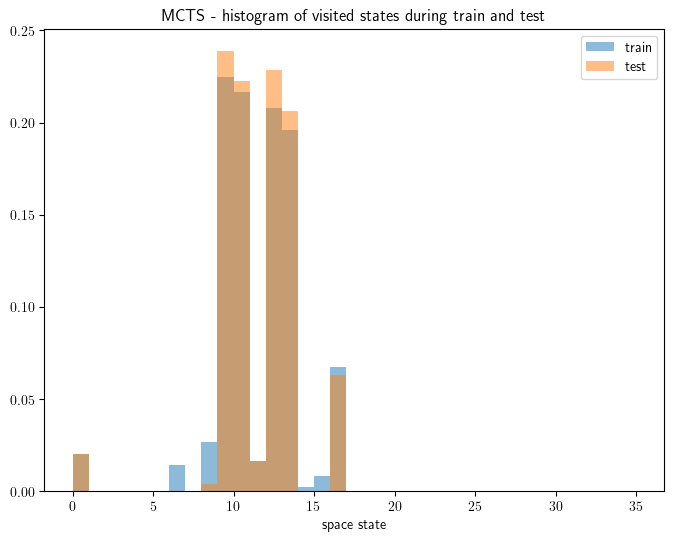

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(encode_visited_states_train, bins=range(total_number_of_states), density=True, alpha=0.5, label="train")
plt.title("MCTS - histogram of visited states during train and test")
plt.xlabel("space state")

plt.hist(encode_visited_states_test, bins=range(total_number_of_states), density=True, alpha=0.5, label="test")
plt.legend()

print("exploration in training:", round(np.unique(encode_visited_states_train).shape[0]/total_number_of_states, 2))
print("exploration in testing:", round(np.unique(encode_visited_states_test).shape[0]/total_number_of_states, 2))

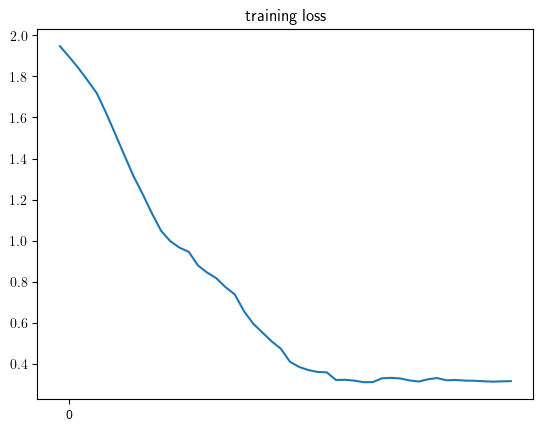

In [ ]:
plt.plot(train_history)
plt.title("training loss")
plt.xticks(range(1,num_training_epochs*epochs,100), range(0,num_training_epochs,100//epochs));

In [18]:
from ipywidgets.widgets import IntSlider
from ipywidgets import interact

def plot_agent(t):
    csrl.mdp.plot(agent=state_history[t][2:], save=f'test/{t}.png')

t=IntSlider(value=0,min=0,max=T[-1]-1)
interact(plot_agent,t=t)

interactive(children=(IntSlider(value=0, description='t', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_agent(t)>

In [ ]:
Q, visited_states =csrl.q_learning(T=100,K=100000)

policy=np.argmax(Q,axis=4)
value=np.max(Q,axis=4)

encode_visited_states = [i[1]*csrl.oa.shape[1]+i[2]*csrl.shape[-3]+i[3] for i in visited_states]

CSRL exploration in training: 0.47


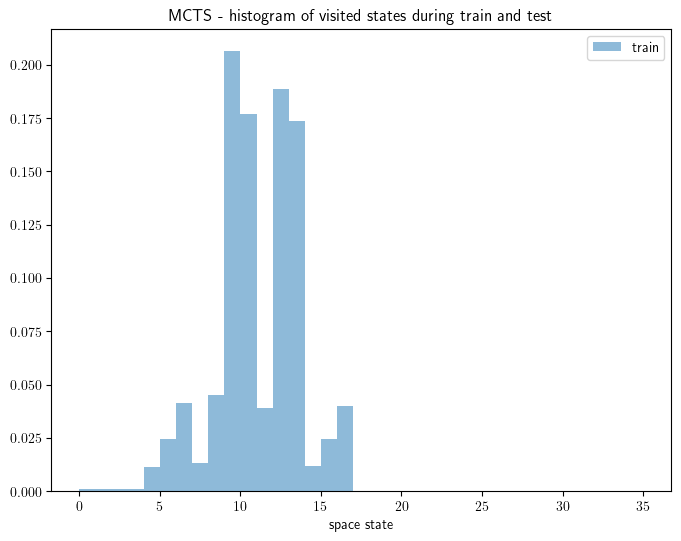

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(encode_visited_states, bins=range(total_number_of_states), density=True, alpha=0.5, label="train")
plt.title("CSRL - histogram of visited states during train and test")
plt.xlabel("space state")

plt.legend()

print("CSRL exploration in training:", round(np.unique(encode_visited_states).shape[0]/total_number_of_states, 2))

In [ ]:
rewards_mean = []
rewards_std = []
n_runs = 200

x = list(range(3,100,1))
for i in T:
    episodes, rew = csrl.run_Q_test(policy, LTL_formula, predicates, T=i, start=(0,0), runs=n_runs, verbose=0)
    rewards_mean.append(100*np.mean(rew))
    rewards_std.append((rewards_mean[-1]-np.sqrt(n_runs*np.var(rew)), rewards_mean[-1]+np.sqrt(n_runs*np.var(rew))))
rewards_std = np.array(rewards_std)

Running 200 simulations with 10 time-steps...
Test finished with:
	success rate: 0 / 200 = 0.0


In [ ]:
episode, rew =csrl.simulate(policy, LTL_formula, predicates, start=(0,0),T=100,plot=True)

interactive(children=(IntSlider(value=0, description='t', max=99), Output()), _dom_classes=('widget-interact',…

In [ ]:
episodes[-1]

[(0, 0, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 2),
 (0, 2, 1, 2),
 (0, 2, 2, 2),
 (0, 1, 1, 2),
 (0, 1, 0, 2),
 (0, 2, 1, 2),
 (0, 2, 2, 2),
 (0, 1, 1, 2),
 (0, 1, 0, 2)]